In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas
import math

from sklearn.linear_model import LinearRegression

In [3]:
csv_filename="Measurement_info.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename)

In [4]:
df = pd.read_csv("Measurement_info.csv")
df1=pd.DataFrame(df)
df1=df1[(df1['Station code'] == 101) & (df1['Item code'] == 9)]
# df1=df1[(df1['Station code'] == 102) & (df1['Item code'] == 9)]
# df1=df1[(df1['Station code'] == 103) & (df1['Item code'] == 9)]
# df1=df1[(df1['Station code'] == 104) & (df1['Item code'] == 9)]
df1=df1.drop(['Measurement date','Instrument status'],axis=1)
dataset=df1['Average value'].values
dataset=dataset.astype('float32')

In [5]:
minimum=min(dataset)
maximum=max(dataset)
for i in range(0,len(dataset)):
    dataset[i]=(dataset[i]-minimum)/(maximum-minimum)

In [6]:
dataset

array([0.11284047, 0.11673152, 0.11673152, ..., 0.03696498, 0.0389105 ,
       0.0311284 ], dtype=float32)

In [7]:
df1['Normalize']=dataset

In [10]:
from sklearn.model_selection import train_test_split
x=df1.iloc[:,:-1]
y=df1.iloc[:,3]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
SupportVectorRegModel=SVR()
SupportVectorRegModel.fit(x_train,y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
y_pred = SupportVectorRegModel.predict(x_train)
y_pred

array([0.12725803, 0.12574493, 0.13676748, ..., 0.13084328, 0.20079783,
       0.1427516 ])

In [14]:
mse = mean_squared_error(y_train,y_pred)
mse

0.009989833788820675

In [15]:
rmse=np.sqrt(mse)
rmse

0.09994915601855113

In [16]:
mae=mean_absolute_error(y_train, y_pred)
mae

0.09992657421387642

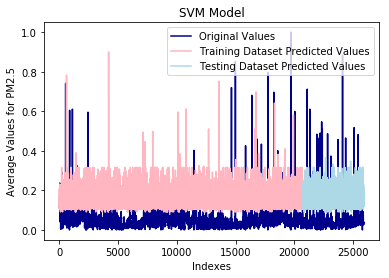

In [18]:
trainpredict=SupportVectorRegModel.predict(x_train)
testpredict=SupportVectorRegModel.predict(x_test)
df_new=pd.DataFrame(trainpredict)
df_new.columns=['trainpredict']
new_index = df_new['trainpredict'].tail(len(testpredict)).index
new_index+=len(testpredict)
new_series=pd.DataFrame(index=new_index, data=testpredict)
df_new=pd.merge(df_new,new_series,how='outer',left_index=True,right_index=True)
df_new.columns=['trainpredict','testpredict']

# plt.plot(dataset,color='darkblue')
# plt.plot(df_new['trainpredict'],color='lightpink')
# plt.plot(df_new['testpredict'],color='lightblue')
plt.title("SVM Model")
plt.xlabel("Indexes")
plt.ylabel("Average Values for PM2.5")
plt.plot(dataset,color='darkblue',label='Original Values')
plt.plot(df_new['trainpredict'],color='lightpink',label='Training Dataset Predicted Values')
plt.plot(df_new['testpredict'],color='lightblue',label='Testing Dataset Predicted Values')
plt.legend()
plt.show()